In [1]:
%reset -f
%matplotlib notebook
from jupyterthemes import jtplot
jtplot.style()

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans

import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
## create random data
## due to the range of the random ints in the dataset we should see clustering in the data
data_1 = np.array([[random.randint(1,400) for i in range(2)] for j in range(50)], dtype = np.float64)
data_2 = np.array([[random.randint(300,700) for i in range(2)] for j in range(50)], dtype = np.float64)
data_3 = np.array([[random.randint(600,900) for i in range(2)] for j in range(50)], dtype = np.float64)
data = np.append(np.append(data_1,data_2,axis=0), data_3, axis=0)
data.shape

(150, 2)

<IPython.core.display.Javascript object>


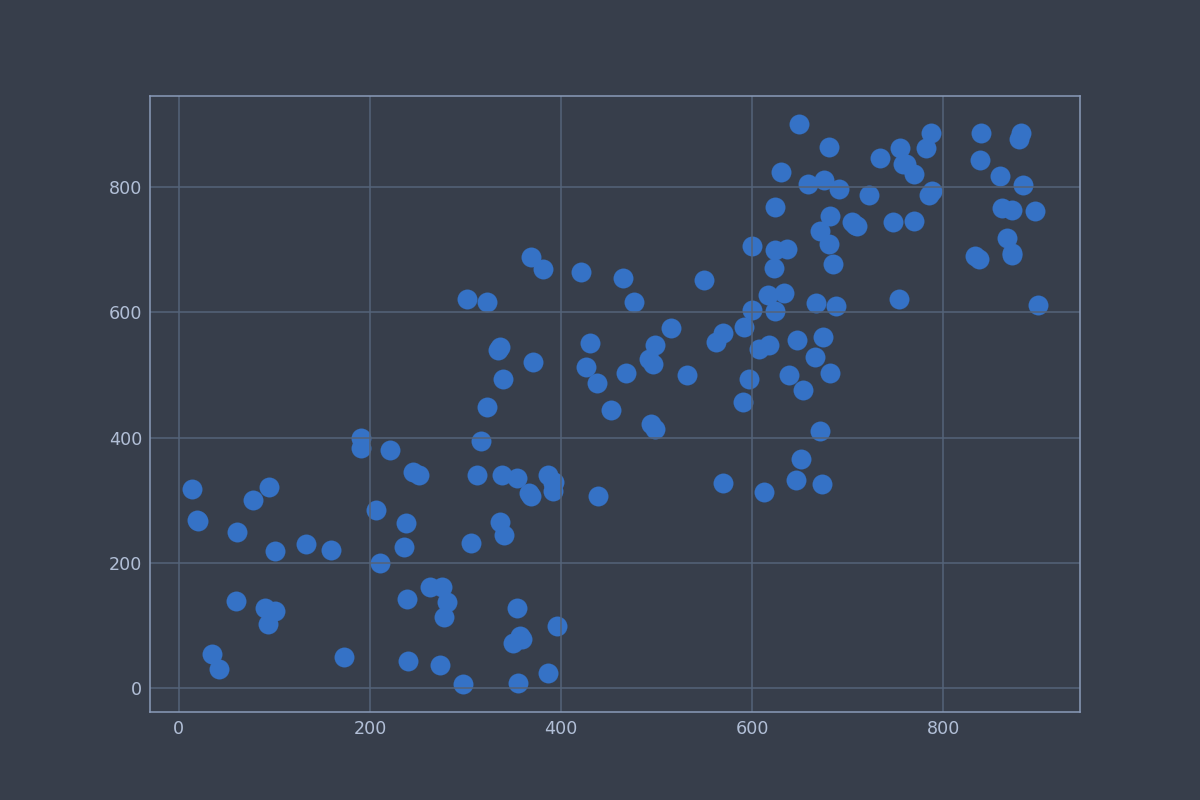

In [3]:
## plot data to see clustering
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(data[:,0],data[:,1],s=200)

In [4]:
## create labels for the data
labels_1 = np.array([0 for i in range(50)])
labels_2 = np.array([1 for i in range(50)])
labels_3 = np.array([2 for i in range(50)])
labels = np.append(np.append(labels_1, labels_2, axis=0), labels_3, axis =0)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
## put data into a dataframe
df = pd.DataFrame({'data_x':data[:,0],'data_y':data[:,1], 'labels':labels})
df.sample(10)

,data_x,data_y,labels
120,884.0,803.0,2
60,592.0,577.0,1
129,671.0,729.0,2
54,336.0,544.0,1
110,872.0,691.0,2
94,612.0,313.0,1
107,624.0,768.0,2
78,421.0,664.0,1
147,761.0,837.0,2
64,666.0,529.0,1


<IPython.core.display.Javascript object>


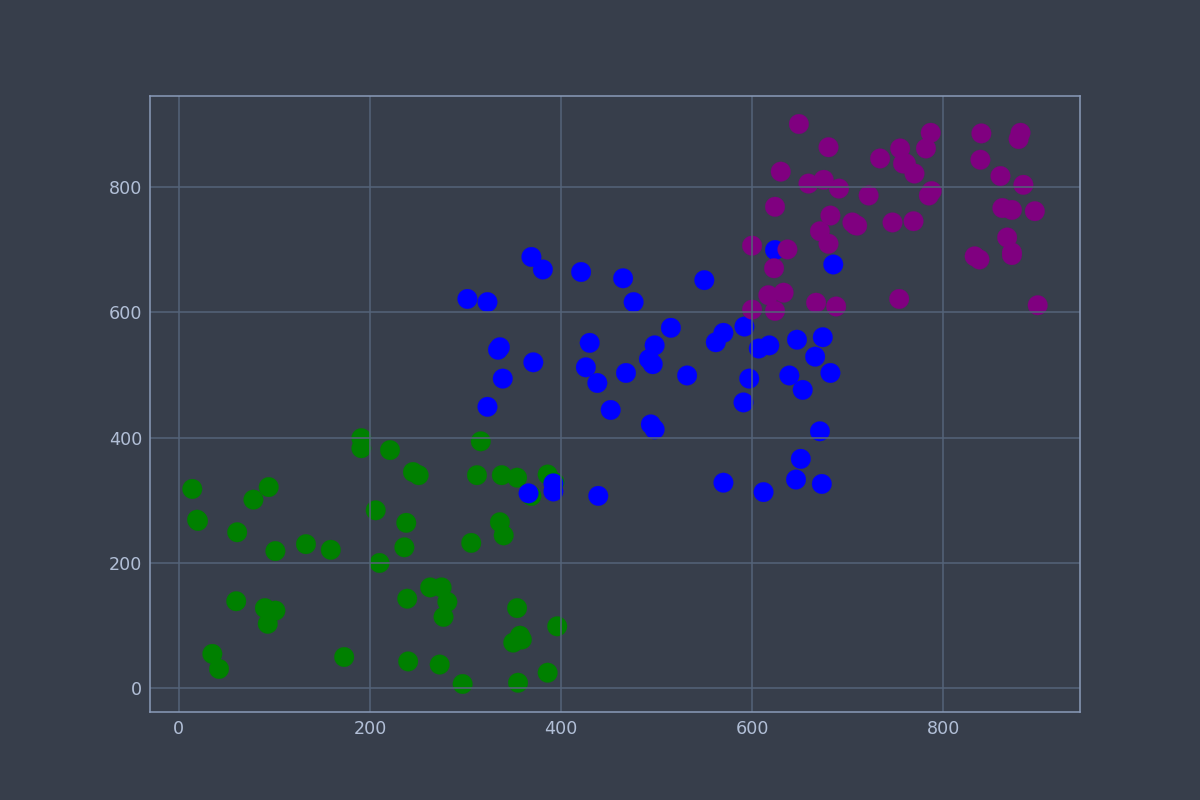

In [6]:
## graph points with labels to see clusters
colors = ['green','blue','purple']
plt.figure(figsize=(12,8))
plt.scatter(df['data_x'],df['data_y'], c = df['labels'],s=200,cmap=matplotlib.colors.ListedColormap(colors))

In [7]:
## create kmeands model
## n_clusters is the number of clusters you want to identify
## max_iter is how many times to adjust model
kmeans_model = KMeans(n_clusters=3, max_iter=10000).fit(data)
## the model assigns labels, these don't necessarily represent our labels, it natively numbers labels
kmeans_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0], dtype=int32)

In [8]:
## print the cetroid positions for the 3 clusters
centroids = kmeans_model.cluster_centers_
centroids

array([[755.89361702, 769.17021277],
       [240.7962963 , 213.57407407],
       [526.34693878, 525.14285714]])

<IPython.core.display.Javascript object>


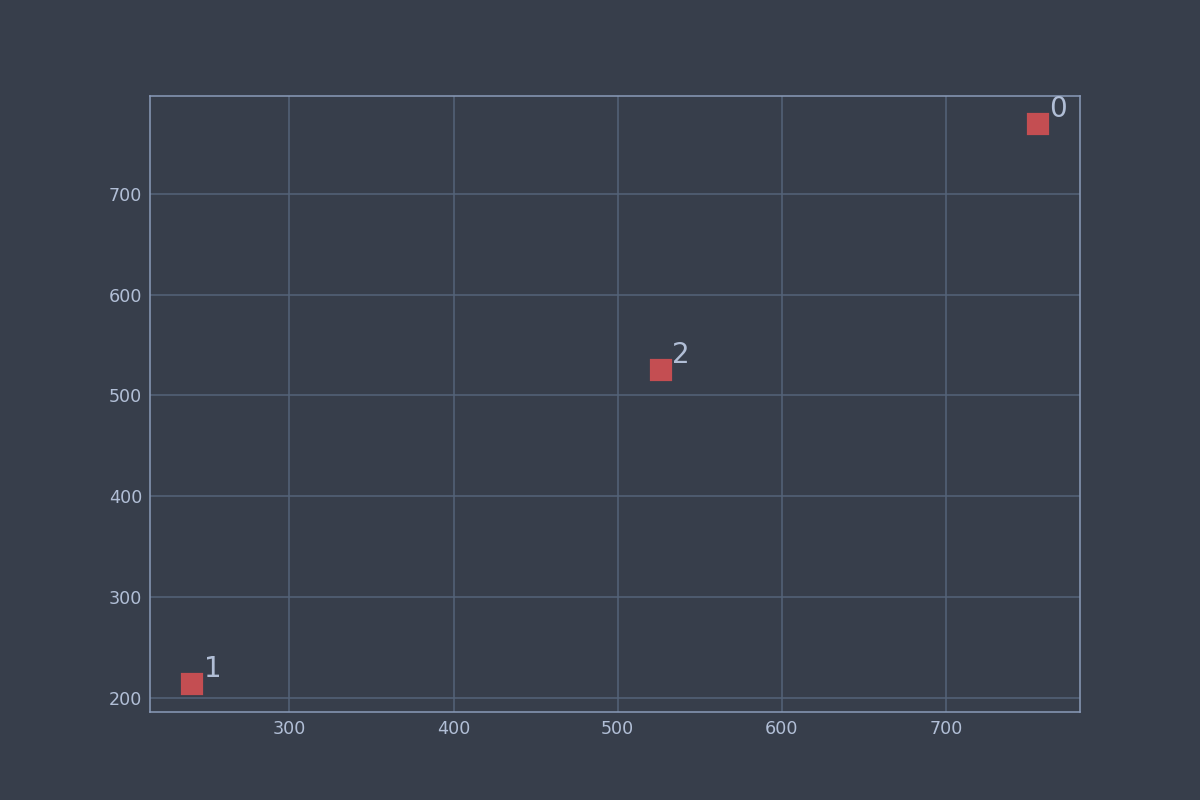

In [9]:
## graph points with labels to see clusters
colors = ['green','blue','purple']
plt.figure(figsize=(12,8))
plt.scatter(centroids[:,0], centroids[:,1], c = 'r',s=250, marker='s')

for i in range(len(centroids)):
    plt.annotate(i,(centroids[i][0]+7, centroids[i][1]+7),fontsize=20)

In [10]:
print('Homogeneity_score: ',metrics.homogeneity_score(labels,kmeans_model.labels_))
print('Completeness_score: ', metrics.completeness_score(labels, kmeans_model.labels_))
print('v_measure_score: ', metrics.v_measure_score(labels, kmeans_model.labels_))
print('Adjusted_rand_score: ',metrics.adjusted_rand_score(labels, kmeans_model.labels_))
print('Adjusted_mutual_info_socre: ', metrics.adjusted_mutual_info_score(labels,kmeans_model.labels_))
print('Silhouette_score: ', metrics.silhouette_score(data, kmeans_model.labels_))

Homogeneity_score:  0.7652960118872076
Completeness_score:  0.7664952064249915
v_measure_score:  0.7658951397489367
Adjusted_rand_score:  0.7960438407259846
Adjusted_mutual_info_socre:  0.7623585134750597
Silhouette_score:  0.4868521738293514


<IPython.core.display.Javascript object>


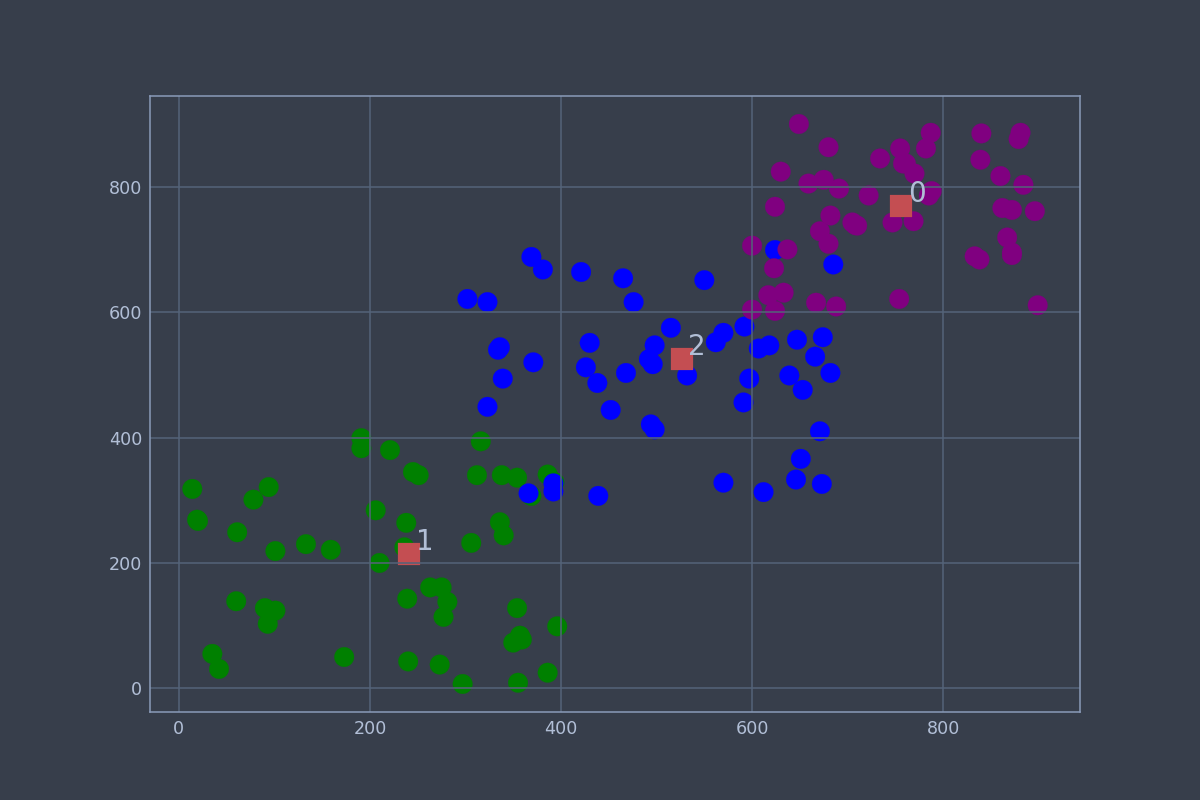

In [11]:
## graph points with labels to see clusters
colors = ['green','blue','purple']
plt.figure(figsize=(12,8))
plt.scatter(df['data_x'],df['data_y'], c = df['labels'],s=200,cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(centroids[:,0], centroids[:,1], c = 'r',s=250, marker='s')

for i in range(len(centroids)):
    plt.annotate(i,(centroids[i][0]+7, centroids[i][1]+7),fontsize=20)

In [12]:
## lets do some prediction
data_test = np.array([[442.,621.],
                     [50.,153.],
                     [333.,373.],
                     [835.,816]])

In [13]:
label_pred = kmeans_model.predict(data_test)
label_pred

array([2, 1, 1, 0], dtype=int32)

<IPython.core.display.Javascript object>


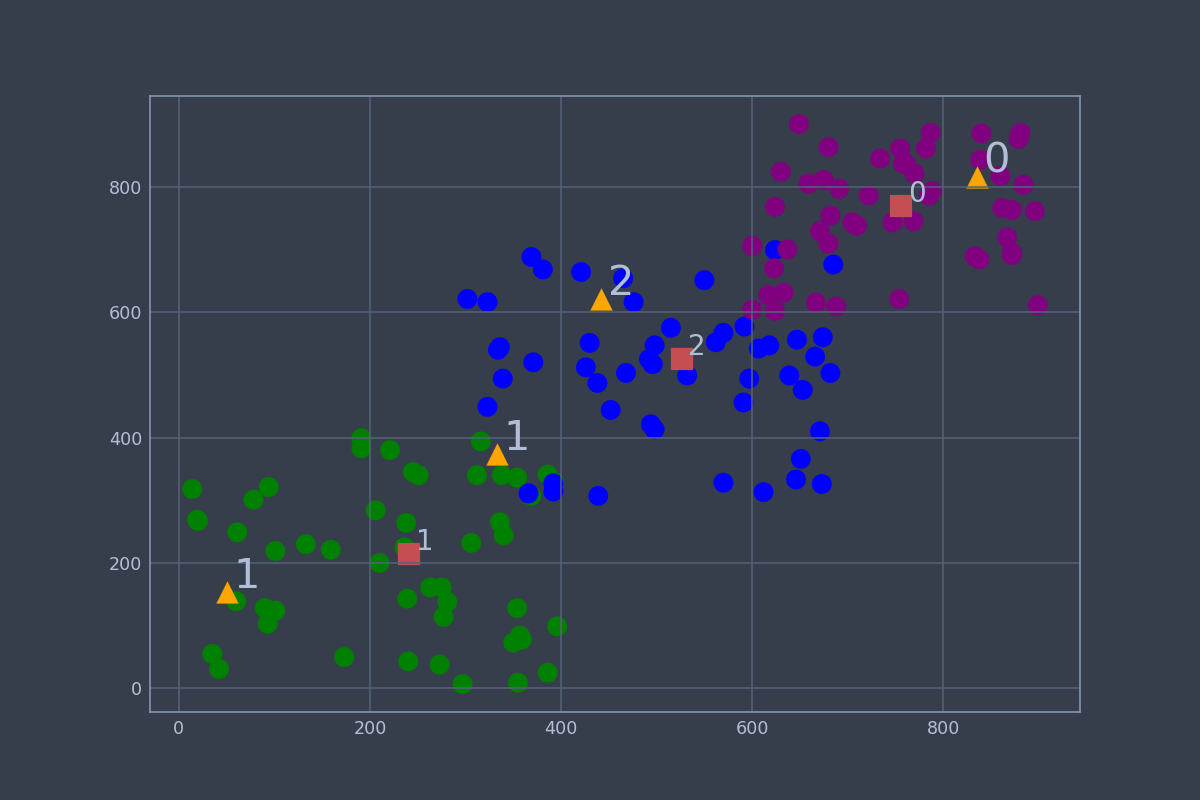

In [14]:
colors = ['green','blue','purple']
plt.figure(figsize=(12,8))
plt.scatter(df['data_x'],df['data_y'], c = df['labels'],s=200,cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(centroids[:,0], centroids[:,1], c = 'r',s=250, marker='s')
for i in range(len(centroids)):
    plt.annotate(i,(centroids[i][0]+7, centroids[i][1]+7),fontsize=20)
plt.scatter(data_test[:,0],data_test[:,1], c='orange',s=250,marker='^')
for i in range(len(data_test)):
    plt.annotate(label_pred[i],(data_test[i][0]+7, data_test[i][1]+7),fontsize=30)